In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")

In [3]:
def get_stats(index):
    
    ghoul_1 = sum([1 for i in data.values if "Ghoul" in i and i[index] < 0.3])
    ghoul_2 = sum([1 for i in data.values if "Ghoul" in i and i[index] > 0.3 and i[index] < 0.6])
    ghoul_3 = sum([1 for i in data.values if "Ghoul" in i and i[index] > 0.6])

    ghost_1 = sum([1 for i in data.values if "Ghost" in i and i[index] < 0.3])
    ghost_2 = sum([1 for i in data.values if "Ghost" in i and i[index] > 0.3 and i[index] < 0.6])
    ghost_3 = sum([1 for i in data.values if "Ghost" in i and i[index] > 0.6])

    goblin_1 = sum([1 for i in data.values if "Goblin" in i and i[index] < 0.3])
    goblin_2 = sum([1 for i in data.values if "Goblin" in i and i[index] > 0.3 and i[index] < 0.6])
    goblin_3 = sum([1 for i in data.values if "Goblin" in i and i[index] > 0.6])
    
    ghoul = [ghoul_1, ghoul_2, ghoul_3]
    ghost = [ghost_1, ghost_2, ghost_3]
    goblin = [goblin_1, goblin_2, goblin_3]
    
    return ghoul, ghost, goblin
    
def plot_stats(ghoul_values, ghost_values, goblin_values):
    
    discrete = ("< 0.3", "0.3 < i < 0.6", "> 0.6")
    y_val = np.arange(len(discrete))
    plt.subplot(2,2,1)
    plt.bar(y_val, ghoul_values, align="center", alpha=1, color="blue", label="Ghouls")
    plt.ylabel("Ghouls")
    plt.subplot(2,2,2)
    plt.bar(y_val, goblin_values, align="center", alpha=1, color="red", label="Goblins")
    plt.ylabel("Goblins")
    plt.subplot(2,2,3)
    plt.bar(y_val, ghost_values, align="center", alpha=1, color="green", label="Ghosts")
    plt.ylabel("Ghosts")
    plt.show()

In [4]:
# Let's look at the differences of classes
# If the Rotting Flesh level is below 0.3 there's a ~50% chance it's a goblin
# If the Rotting Flesh level is above 0.6 there's a ~50% chance it's a ghost

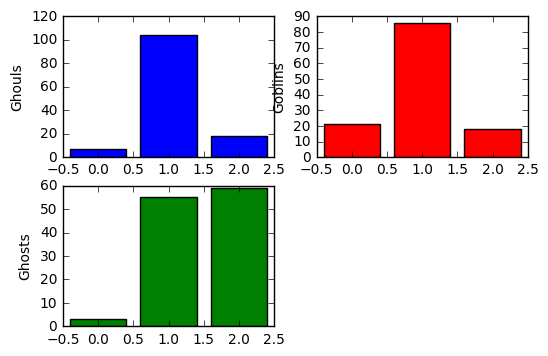

In [5]:
ghoul, ghost, goblin = get_stats(2)
plot_stats(ghoul, ghost, goblin)

In [6]:
# Let's do the same for "has_soul"
# If soul is less than 0.3 there's a ~80% chance it's a ghost
# If soul is more than 0.6 there's a ~95% chance it's NOT a ghost

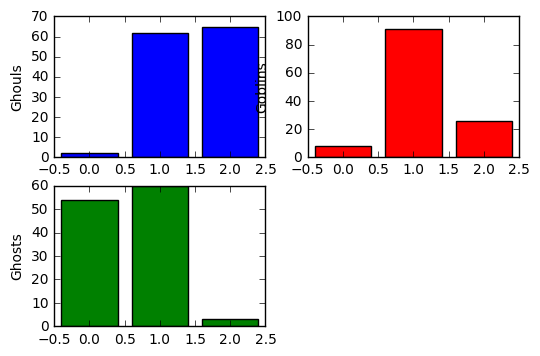

In [7]:
ghoul, ghost, goblin = get_stats(4)
plot_stats(ghoul, ghost, goblin)

In [8]:
# Bone Length isn't as divisive
# If Bone Length is less than 0.3 there's a ~70% chance its a Ghost

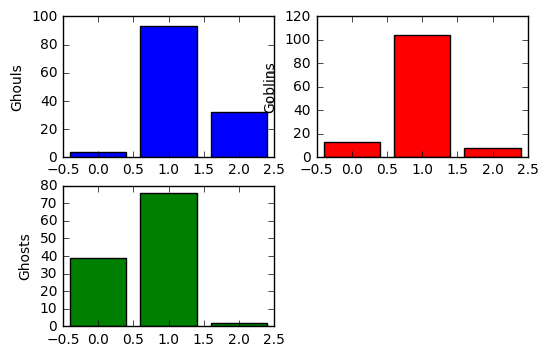

In [9]:
ghoul, ghost, goblin = get_stats(1)
plot_stats(ghoul, ghost, goblin)

In [10]:
# Lastly lets investigate "hair_length"
# If hair length is above 0.6 there's a ~65% chance it's a Ghoul
# If hair length is below 0.3 there's a ~85% chance it's a Ghost!

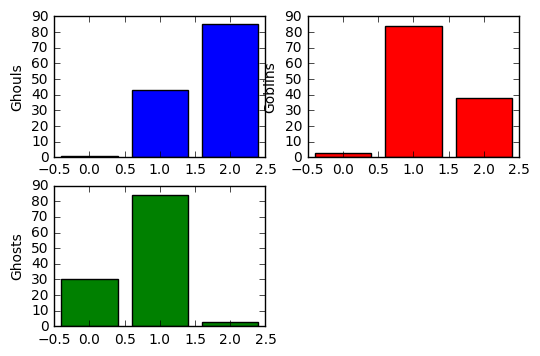

In [11]:
ghoul, ghost, goblin = get_stats(3)
plot_stats(ghoul, ghost, goblin)

In [12]:
# Does Color Matter?

In [13]:
colors = ["white", "black", "clear", "blue", "green", "blood"]
monsters = ["Ghoul", "Goblin", "Ghost"]
def color_count(color, monster):
    count = []
    for row in data.values:
        if monster in row and color in row:
            count.append(1)
    return sum(count)

for color in colors:
    for monster in monsters:
        print("{}_{}: {}".format(color, monster, color_count(color, monster)))

white_Ghoul: 50
white_Goblin: 43
white_Ghost: 44
black_Ghoul: 14
black_Goblin: 13
black_Ghost: 14
clear_Ghoul: 42
clear_Goblin: 46
clear_Ghost: 32
blue_Ghoul: 6
blue_Goblin: 7
blue_Ghost: 6
green_Ghoul: 13
green_Goblin: 14
green_Ghost: 15
blood_Ghoul: 4
blood_Goblin: 2
blood_Ghost: 6


In [14]:
# It seems that most monsters are split between two primary colors and spread out amongst the remaining 4
# We'll ignore this feature for now

data.drop("color", inplace=True, axis=1)

In [15]:
# Data Preparation

In [16]:
type_encoder = LabelEncoder()
class_labels = type_encoder.fit_transform(data["type"])
data.drop("type", inplace=True, axis=1)
data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul
0,0,0.354512,0.350839,0.465761,0.781142
1,1,0.575560,0.425868,0.531401,0.439899
2,2,0.467875,0.354330,0.811616,0.791225
3,4,0.776652,0.508723,0.636766,0.884464
4,5,0.566117,0.875862,0.418594,0.636438


In [17]:
# Training Several Algorithms
# Looks like Random Forests is our Best bet, even with overfitting

In [18]:
lr = LogisticRegression(C=0.01)
lr2 = LogisticRegression(C=0.1)
forest = RandomForestClassifier(criterion="entropy", n_estimators=10, random_state=1, n_jobs=2)
X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size=0.1, random_state=0)

lr.fit(X_train, y_train)
lr2.fit(X_train, y_train)
forest.fit(X_train, y_train)

print("1st Logistic Regression:\nTraining Score: {}\nTesting Score: {}".format(lr.score(X_train, y_train), 
                                                                               lr.score(X_test, y_test)))
print("2nd Logistic Regression:\nTraining Score: {}\nTesting Score: {}".format(lr2.score(X_train, y_train), 
                                                                               lr2.score(X_test, y_test)))
print("Random Forests:\nTraining Score: {}\nTesting Score: {}".format(forest.score(X_train, y_train), 
                                                                               forest.score(X_test, y_test)))

1st Logistic Regression:
Training Score: 0.35735735735735735
Testing Score: 0.3157894736842105
2nd Logistic Regression:
Training Score: 0.6546546546546547
Testing Score: 0.6842105263157895
Random Forests:
Training Score: 0.993993993993994
Testing Score: 0.7631578947368421


In [19]:
# Produce our Output file

In [20]:
submission = pd.read_csv("test.csv")
submission.drop(labels="color", axis=1, inplace=True)
predictions = [int(lr2.predict(row.reshape(1, -1))) for row in submission.values]
predictions = type_encoder.inverse_transform(predictions)
submission["type"] = predictions
final_csv = submission[["id", "type"]]
final_csv.to_csv("submission_data2.csv")